In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
import matplotlib as mpl
import seaborn as sns
import koreanize_matplotlib


mpl.rc('font', family='AppleGothic')


ilgan = pd.read_csv('일간기온전처리.csv', encoding='euc-kr')
ilgan.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
ilgan['날짜'] = ilgan['날짜'].str.replace('\t', '')

ilgan['날짜'] = ilgan['날짜'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
# ilgan[ilgan['날짜'].dt.month == 1]

ilgan = ilgan.drop(ilgan.index[15433:16463]) # 50~53년 결측치 제외


In [5]:
ilgan.iloc[15433]

날짜      1954-01-01 00:00:00
지점                    108.0
평균기온                   -2.4
최저기온                   -7.8
최고기온                    4.0
Name: 16463, dtype: object

In [6]:
# springdf = ilgan[ilgan['날짜'].dt.month in [3, 4, 5]]
springdf = ilgan['날짜'].dt.month.isin([3,4,5])
ilgan[springdf]
summerdf = ilgan['날짜'].dt.month.isin([6,7,8])
ilgan[summerdf]
falldf = ilgan['날짜'].dt.month.isin([9,10,11])
ilgan[falldf]
winterdf = ilgan['날짜'].dt.month.isin([1,2,12])
ilgan[winterdf]

,날짜,지점,평균기온,최저기온,최고기온
61,1907-12-01,108.0,-4.6,-10.5,1.4
62,1907-12-02,108.0,-3.1,-9.0,3.4
63,1907-12-03,108.0,1.9,-2.6,6.1
64,1907-12-04,108.0,-1.2,-2.7,1.3
65,1907-12-05,108.0,-1.0,-6.9,2.6
...,...,...,...,...,...
42025,2023-12-27,108.0,1.5,-2.8,6.8
42026,2023-12-28,108.0,1.2,-1.7,4.4
42027,2023-12-29,108.0,1.3,-1.5,4.6
42028,2023-12-30,108.0,0.6,-0.9,2.1


<BarContainer object of 102 artists>

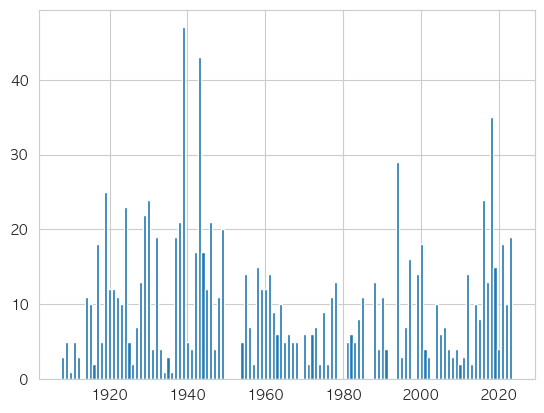

In [7]:
pokdf = ilgan[ilgan['최고기온'] >= 33].copy()
pokdf['년도'] = pokdf['날짜'].dt.year
pokcount = pokdf.groupby('년도').count()['최고기온']

plt.bar(pokcount.index, 
        pokcount,
        align='center',
        )
# plt.hist(pokcount.index, pokcount, bins)
# plt.xticks(["" for x in range(resultcount.shape[0])])

<BarContainer object of 113 artists>

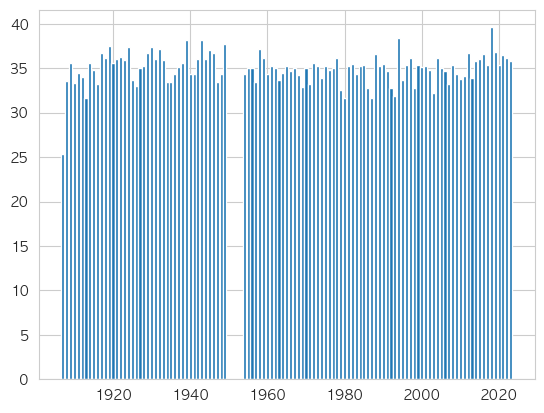

In [8]:
tmpmaxdf = ilgan.copy()
tmpmaxdf['년도'] = tmpmaxdf['날짜'].dt.year
tmpmaxcount = tmpmaxdf.groupby('년도').max()['최고기온']

plt.bar(tmpmaxcount.index, 
        tmpmaxcount,
        align='center',
        )
# plt.xticks(["" for x in range(resultcount.shape[0])])

<BarContainer object of 86 artists>

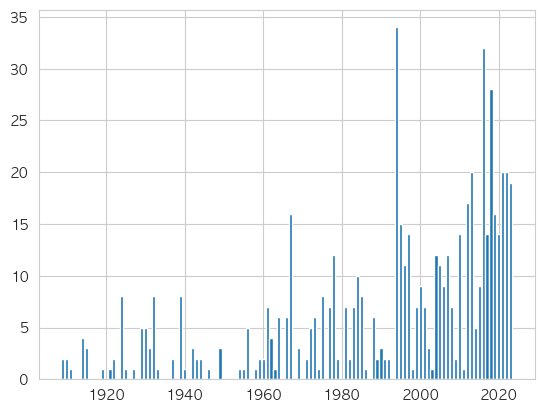

In [9]:
yeoldf = ilgan[ilgan['최저기온'] >= 25].copy()
yeoldf['년도'] = yeoldf['날짜'].dt.year
yeolcount = yeoldf.groupby('년도').count()['최고기온']

plt.bar(yeolcount.index, 
        yeolcount,
        align='center',
        )
# plt.xticks(["" for x in range(resultcount.shape[0])])

<BarContainer object of 105 artists>

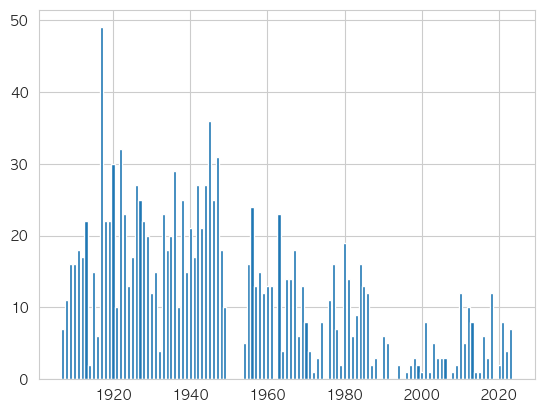

In [10]:
handf = ilgan[ilgan['최저기온'] <= -12].copy()
handf['년도'] = handf['날짜'].dt.year
hancount = handf.groupby('년도').count()['최고기온']

plt.bar(hancount.index, 
        hancount,
        align='center',
        )
# plt.xticks(["" for x in range(resultcount.shape[0])])

<BarContainer object of 113 artists>

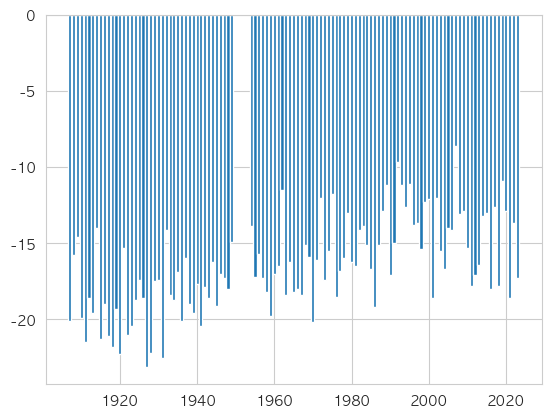

In [11]:
tmpmindf = ilgan.copy()
tmpmindf['년도'] = tmpmindf['날짜'].dt.year
tmpmincount = tmpmindf.groupby('년도').min()['최저기온']

plt.bar(tmpmincount.index, 
        tmpmincount,
        align='center',
        )

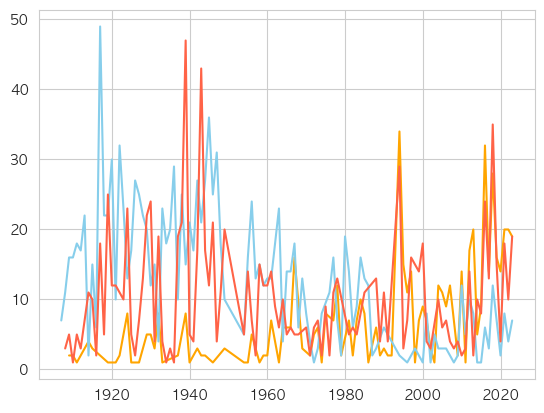

In [18]:
plt.plot(yeolcount, color='orange')
plt.plot(hancount, color='skyblue')
plt.plot(pokcount, color='tomato')

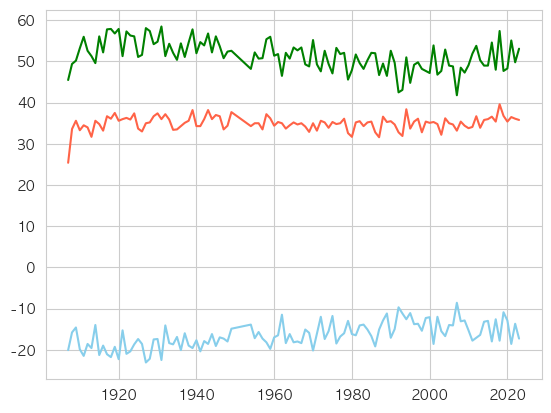

In [37]:
plt.plot(tmpmaxcount, color='tomato')
plt.plot(tmpmincount, color='skyblue')
plt.plot(tmpmaxcount-tmpmincount, color='green')
# 
# tmpss = tmpmincount - tmpmincount
# plt.plot(tmpss, color='tomato')


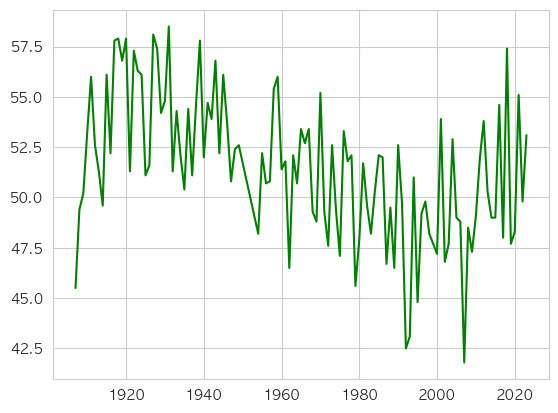

In [34]:
plt.plot(tmpmaxcount - tmpmincount, color='green')

In [13]:
# yeolcount

In [14]:
yphdf = pd.DataFrame({'열대야': yeolcount, '폭염': pokcount, '한파': hancount})
yphdf

maxmindf = pd.DataFrame({'최고기온':tmpmaxcount, '최저기온':tmpmincount})

yphmmdf = pd.DataFrame({'열대야일수': yeolcount, '폭염일수': pokcount, '한파일수': hancount, '연간최고기온':tmpmaxcount, '연간최저기온':tmpmincount, '봄':springdf, '여름':summerdf, '가을':falldf, '겨울':winterdf})
# yphmmdf


<Axes: ylabel='년도'>

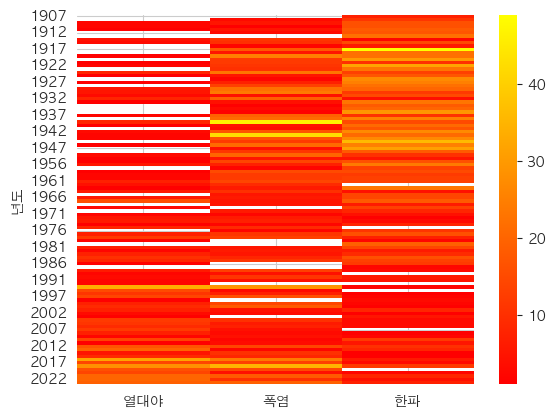

In [15]:
sns.heatmap(yphdf, cmap="autumn")

<Axes: >

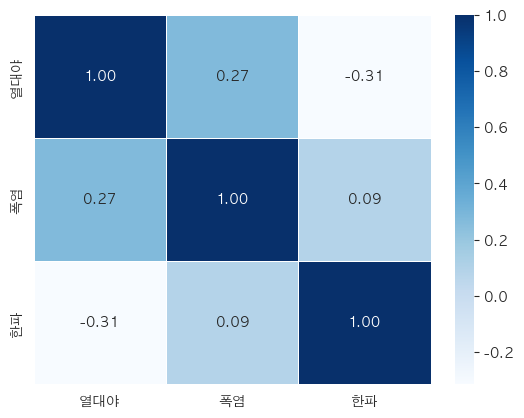

In [16]:
sns.heatmap(data = yphdf.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

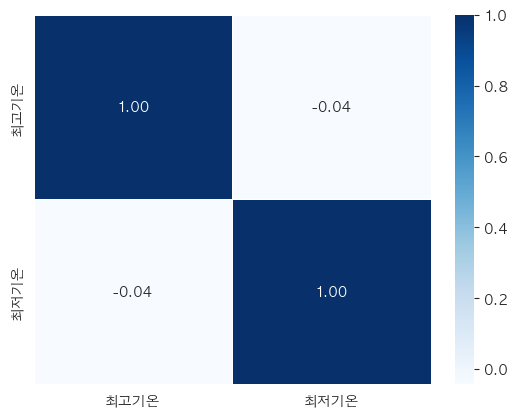

In [17]:
sns.heatmap(data = maxmindf.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [83]:
summerdf = summerdf.fillna(0, inplace=True)
falldf = falldf.fillna(0, inplace=True)

<Axes: >

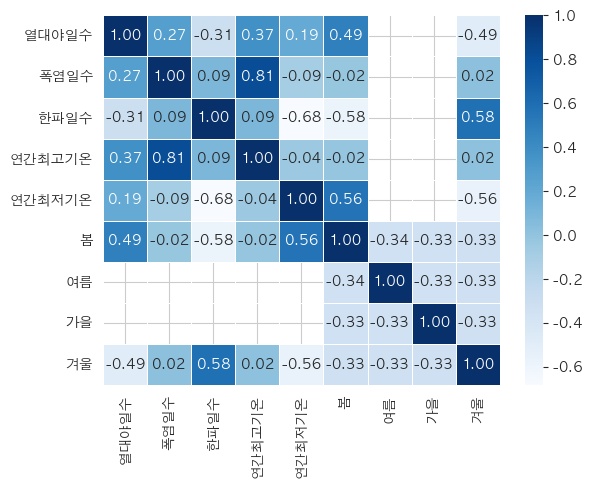

In [84]:
sns.heatmap(data = yphmmdf.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')